## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset

combined_data = pd.merge(study_results, mouse_metadata,how='outer', on="Mouse ID")

combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [21]:
# Checking the number of mice in the DataFrame.

combined_data['Mouse ID'].value_counts().head()


g989    13
v923    10
g296    10
o287    10
u364    10
Name: Mouse ID, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

study_data_mice = study_data.set_index('Mouse ID')
mouse = study_data_mice.loc['g989', :]
mouse.head()


In [37]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_data["mouse ID"]= combined_data.duplicated()
combined_data.duplicated().head() 

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data.drop_duplicates("Mouse ID").head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),mouse ID
0,b128,0,45.0,0,Capomulin,Female,9,22,False
10,f932,0,45.0,0,Ketapril,Male,15,29,NaN
11,g107,0,45.0,0,Ketapril,Female,2,29,NaN
19,a457,0,45.0,0,Ketapril,Female,11,30,NaN
22,c819,0,45.0,0,Ketapril,Male,21,25,NaN


In [43]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = combined_data.drop_duplicates("Mouse ID").count()
number_of_mice

Mouse ID              249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
mouse ID              249
dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summarystats = pd.DataFrame(combined_data.groupby("Drug Regimen").count())
summarystats


summarystats["Mean"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summarystats["Median"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summarystats["Standard Deviation"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summarystats["Variance"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summarystats["SEM"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

summarystats = summarystats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]
summarystats.head()


,Mouse ID,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


## Bar Plots

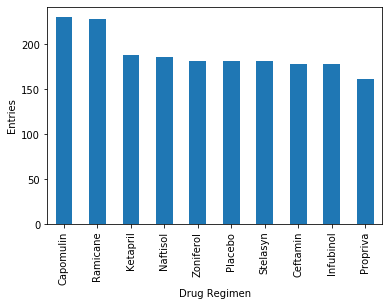

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

counts = combined_data['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Entries")
plt.show()


## Pie Plots

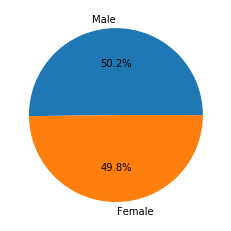

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


counts = mouse_metadata.Sex.value_counts()
plt.pie(counts.values,labels=["Male", "Female"],autopct='%1.1f%%')
plt.show()



## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.


filtered_df = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin")]

filtered_df = filtered_df.sort_values("Timepoint", ascending = False)
                                
filtered_df = filtered_df.drop_duplicates(subset="Mouse ID", keep='first')
                                
quartiles = filtered_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
                                
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
                                
outliers_df = filtered_df.loc[(filtered_df['Tumor Volume (mm3)'] > upper_bound) | (filtered_df['Tumor Volume (mm3)'] < lower_bound), :]
outliers_df                                





,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


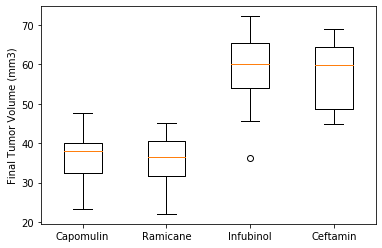

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


by_mouse = combined_data.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

merged_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(combined_data,on=['Mouse ID','Timepoint'],how="left")

def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(outliers)
    return regimen_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

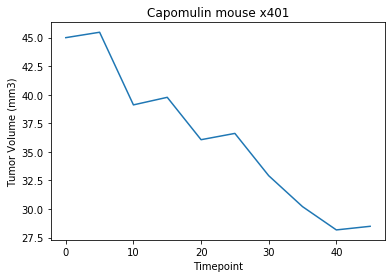

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

def get_line_plot(regimen, mouse_id):
    regimen_data = combined_data.loc[combined_data["Drug Regimen"] == regimen]
    data_by_id = regimen_data.loc[regimen_data['Mouse ID'] == mouse_id]
    plt.plot(data_by_id['Timepoint'], data_by_id['Tumor Volume (mm3)'])
    plt.xlabel('Timepoint')
    plt.ylabel('Tumor Volume (mm3)')
    plt.title(regimen + " mouse " + mouse_id)
    plt.show()
    
get_line_plot("Capomulin", "x401")


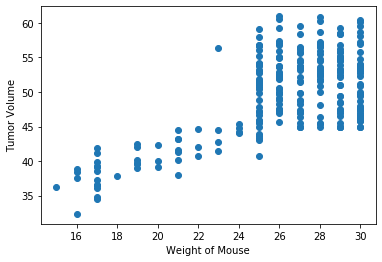

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_weight = combined_data.groupby(combined_data["Mouse ID"])["Weight (g)"].mean()
tumor_volume = combined_data.groupby(combined_data["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()






## Correlation and Regression

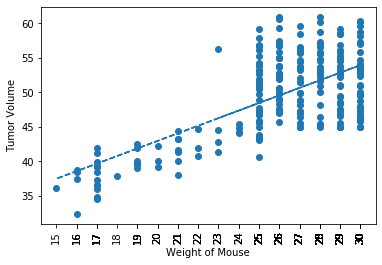

The correlation between weight and tumor value is 0.66


In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


mouse_weight = combined_data.groupby(combined_data["Mouse ID"])["Weight (g)"].mean()
tumor_volume = combined_data.groupby(combined_data["Mouse ID"])["Tumor Volume (mm3)"].mean()



slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)

fit = slope * mouse_weight + int

plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {corr}')
